In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Census

In [2]:
# From Lecture 6

# As of Feb 2018, this census file is online here: 
# data = 'http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.csv'

# We will used a local copy instead
data = 'nc-est2015-agesex-res.csv'

full_census_table = Table.read_table(data)
full_census_table
partial = full_census_table.select(['SEX', 'AGE', 4, 9])
us_pop = partial.relabeled(2, '2010').relabeled(3, '2015')
ratio = (us_pop.column(3) / us_pop.column(2))
census = us_pop.with_columns(
        'Change', us_pop.column(3) - us_pop.column(2), 
        'Total Growth', ratio - 1,
        'Annual Growth', ratio ** (1/5) - 1)
census.set_format([2, 3, 4], NumberFormatter)
census.set_format([5, 6], PercentFormatter)

SEX,AGE,2010,2015,Change,Total Growth,Annual Growth
0,0,"3,951,330","3,978,038","26,708",0.68%,0.13%
0,1,"3,957,888","3,968,564","10,676",0.27%,0.05%
0,2,"4,090,862","3,966,583","-124,279",-3.04%,-0.62%
0,3,"4,111,920","3,974,061","-137,859",-3.35%,-0.68%
0,4,"4,077,551","4,020,035","-57,516",-1.41%,-0.28%
0,5,"4,064,653","4,018,158","-46,495",-1.14%,-0.23%
0,6,"4,073,013","4,019,207","-53,806",-1.32%,-0.27%
0,7,"4,043,046","4,148,360","105,314",2.60%,0.52%
0,8,"4,025,604","4,167,887","142,283",3.53%,0.70%
0,9,"4,125,415","4,133,564","8,149",0.20%,0.04%


In [3]:
# make a table of the US population by age
by_age = census.where('SEX', 0).drop('SEX').where('AGE', are.below(999))
by_age

AGE,2010,2015,Change,Total Growth,Annual Growth
0,"3,951,330","3,978,038","26,708",0.68%,0.13%
1,"3,957,888","3,968,564","10,676",0.27%,0.05%
2,"4,090,862","3,966,583","-124,279",-3.04%,-0.62%
3,"4,111,920","3,974,061","-137,859",-3.35%,-0.68%
4,"4,077,551","4,020,035","-57,516",-1.41%,-0.28%
5,"4,064,653","4,018,158","-46,495",-1.14%,-0.23%
6,"4,073,013","4,019,207","-53,806",-1.32%,-0.27%
7,"4,043,046","4,148,360","105,314",2.60%,0.52%
8,"4,025,604","4,167,887","142,283",3.53%,0.70%
9,"4,125,415","4,133,564","8,149",0.20%,0.04%


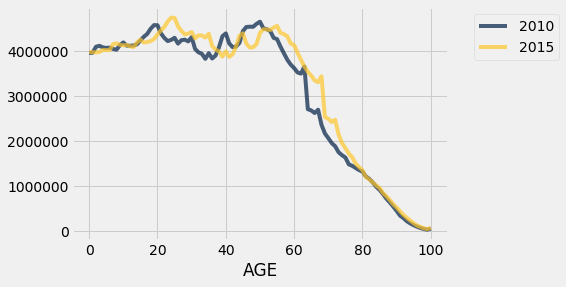

In [4]:
by_age.select("AGE","2010","2015").plot("AGE")

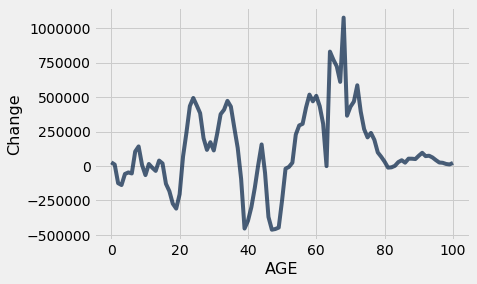

In [5]:
by_age.select("AGE","Change").plot("AGE")

In [6]:
by_age.sort("Change", descending=True)

AGE,2010,2015,Change,Total Growth,Annual Growth
68,"2,359,816","3,436,357","1,076,541",45.62%,7.81%
64,"2,706,055","3,536,156","830,101",30.68%,5.50%
65,"2,678,525","3,450,043","771,518",28.80%,5.19%
66,"2,621,335","3,344,134","722,799",27.57%,4.99%
67,"2,693,707","3,304,187","610,480",22.66%,4.17%
72,"1,883,820","2,469,605","585,785",31.10%,5.56%
58,"3,802,447","4,320,522","518,075",13.62%,2.59%
60,"3,616,721","4,125,792","509,071",14.08%,2.67%
24,"4,243,602","4,737,345","493,743",11.63%,2.23%
34,"3,822,189","4,294,838","472,649",12.37%,2.36%


In [7]:
2010-68 # Bombing of Pearl Harbor was 12/7/1941

1942

In [8]:
2015-68 # Bombing of Nagasaki was 8/9/1945

1947

In [9]:
by_age.where('AGE', are.above(95)).show()

AGE,2010,2015,Change,Total Growth,Annual Growth
96,"97,161","122,887","25,726",26.48%,4.81%
97,"68,893","92,377","23,484",34.09%,6.04%
98,"47,037","61,991","14,954",31.79%,5.68%
99,"32,178","43,641","11,463",35.62%,6.28%
100,"54,410","76,974","22,564",41.47%,7.18%


## Movies

In [10]:
actors = Table.read_table('actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


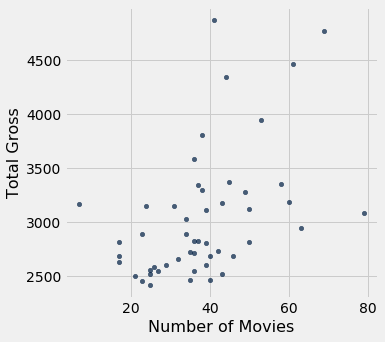

In [11]:
actors.scatter('Number of Movies', 'Total Gross')

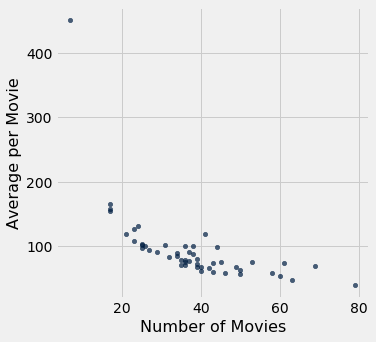

In [12]:
actors.scatter('Number of Movies', 'Average per Movie')

Let's find the outlier: which actor appears in <10 movies?

In [13]:
actors.where('Number of Movies', are.below(10))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


Now let's remove the outlier from the table, and make a scatter plot of the other actors

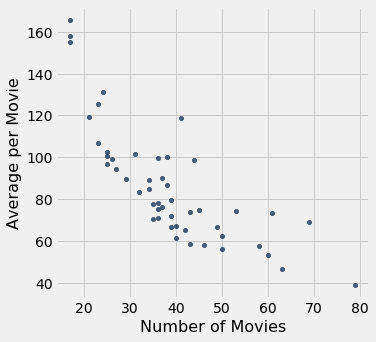

In [14]:
no_outlier = actors.where('Number of Movies', are.above(10))
no_outlier.scatter('Number of Movies', 'Average per Movie')

In [15]:
actors.where('Number of Movies', are.above(50))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Bruce Willis,3189.4,60,53.2,Sixth Sense,293.5
Robert DeNiro,3081.3,79,39,Meet the Fockers,279.3
Liam Neeson,2942.7,63,46.7,The Phantom Menace,474.5


In [16]:
movies = Table.read_table('movies_by_year.csv')
movies

Year,Total Gross,Number of Movies,#1 Movie
2015,11128.5,702,Star Wars: The Force Awakens
2014,10360.8,702,American Sniper
2013,10923.6,688,Catching Fire
2012,10837.4,667,The Avengers
2011,10174.3,602,Harry Potter / Deathly Hallows (P2)
2010,10565.6,536,Toy Story 3
2009,10595.5,521,Avatar
2008,9630.7,608,The Dark Knight
2007,9663.8,631,Spider-Man 3
2006,9209.5,608,Dead Man's Chest


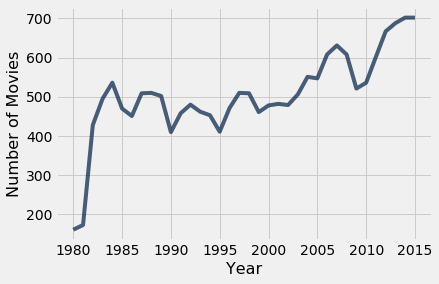

In [17]:
movies.plot('Year', 'Number of Movies')

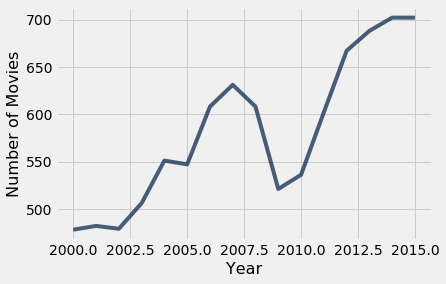

In [18]:
century_21 = movies.where('Year', are.above(1999))
century_21.plot('Year', 'Number of Movies')

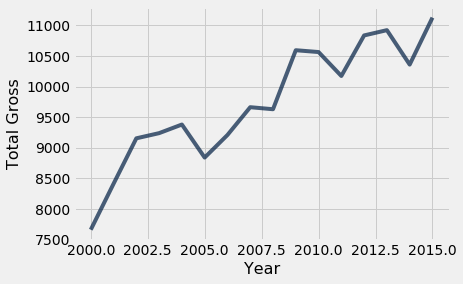

In [19]:
century_21.plot('Year', 'Total Gross')

In [20]:
century_21.where('Year', are.equal_to(2009))

Year,Total Gross,Number of Movies,#1 Movie
2009,10595.5,521,Avatar


## Categorical Distributions

In [21]:
top = Table.read_table('top_movies.csv')
top.set_format([2, 3], NumberFormatter)
top

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista (Disney),"906,723,418","906,723,400",2015
Avatar,Fox,"760,507,625","846,120,800",2009
Titanic,Paramount,"658,672,302","1,178,627,900",1997
Jurassic World,Universal,"652,270,625","687,728,000",2015
Marvel's The Avengers,Buena Vista (Disney),"623,357,910","668,866,600",2012
The Dark Knight,Warner Bros.,"534,858,444","647,761,600",2008
Star Wars: Episode I - The Phantom Menace,Fox,"474,544,677","785,715,000",1999
Star Wars,Fox,"460,998,007","1,549,640,500",1977
Avengers: Age of Ultron,Buena Vista (Disney),"459,005,868","465,684,200",2015
The Dark Knight Rises,Warner Bros.,"448,139,099","500,961,700",2012


What are the top 5 movies by gross? Make a bar chart.

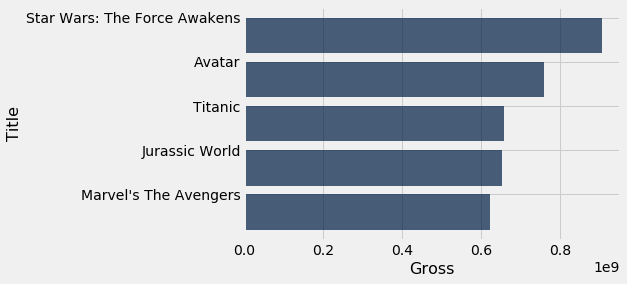

In [22]:
top5 = top.take(np.arange(5))
top5.barh("Title", "Gross")

How large is the adjusted gross of the top 5 movies by Gross? Make a bar chart.

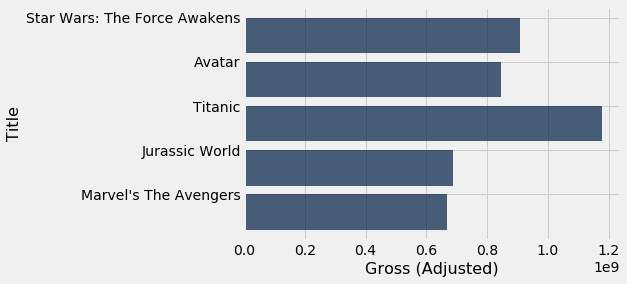

In [23]:
top5.barh("Title", "Gross (Adjusted)")

What are the top 5 movies by adjusted gross? Make a bar chart.

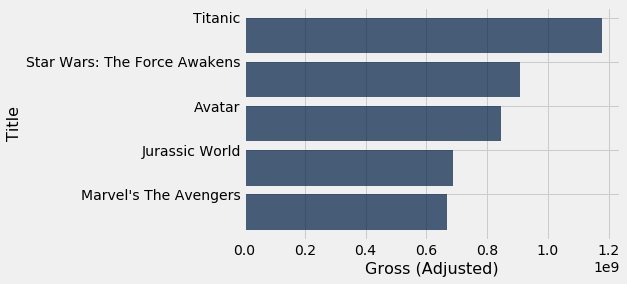

In [24]:
top5.sort("Gross (Adjusted)", descending=True)\
    .barh("Title", "Gross (Adjusted)")

We can also plot a bar chart of every column in a table by naming which column to plot by. This works for tables of two or more columns, and creates stacked bar charts.

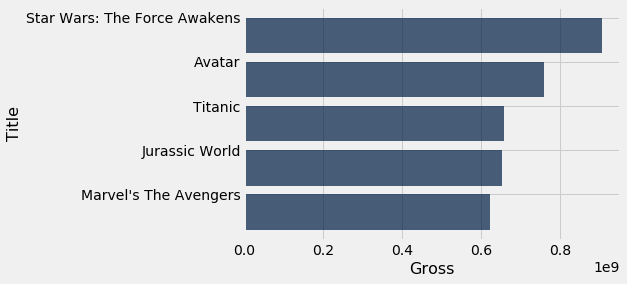

In [25]:
top5.select('Title', 'Gross').barh('Title')

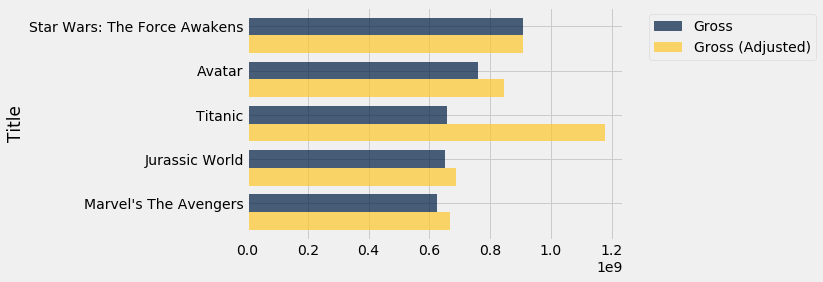

In [26]:
top5.select('Title', 'Gross', 'Gross (Adjusted)').barh('Title')

We can use the `group` method to answer the question: How many movies did each studio make?

In [27]:
studios = top.group('Studio')
studios

Studio,count
AVCO,1
Buena Vista (Disney),29
Columbia,10
Disney,11
Dreamworks,3
Fox,26
IFC,1
Lionsgate,3
MGM,7
MPC,1


Make a bar chart to show which studios made the most movies.

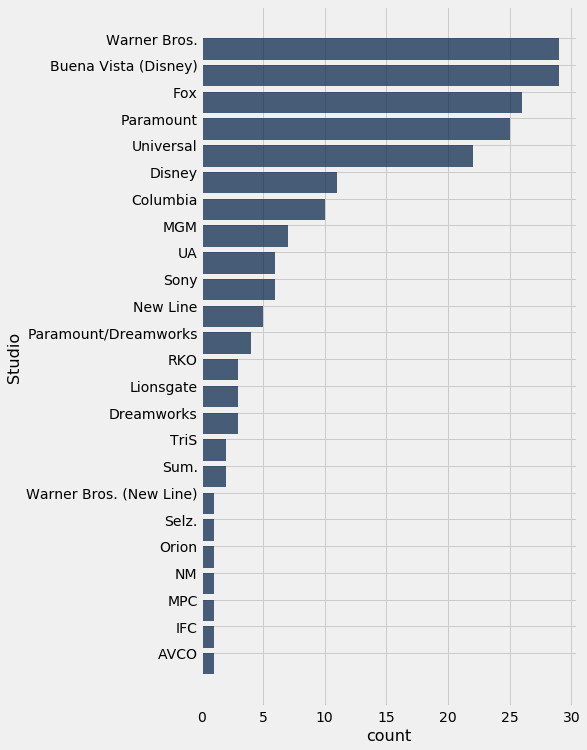

In [28]:
studios.sort('count', descending=True).barh('Studio')